In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import tikzplotlib
import os

import scipy.stats as st

In [50]:
scratchHPC = r's'

In [54]:
StudienOrdner = r'U:\Results\HRC_60\combined_results'

In [55]:
lf_csv = r'_eval/lifetime.csv'
lf_csv = os.path.join(StudienOrdner, r'lifetime.csv')

In [56]:
os.path.isdir(StudienOrdner)

True

In [57]:
df_lf = pd.read_csv(lf_csv)

In [58]:
df_lf

,Unnamed: 0,ModelName,ModelGroup,Lifetime,Phase,_LoadingMode,StrainAmplitude,StrainMean,StressAmplitude,StressMean,FIPmax,FIPmaxLocal,FIPcrit,m_FIP,IsExperimentalData
0,0.0,DisTest_Seed36003_Strain0p3_VolumeFraction80,ALL,40715.489473,wholeMod,0.0,0.003,0.0,602.9370,-0.0470,0.005345,0.009622,2.521240,1.724138,0
1,0.1,DisTest_Seed36003_Strain0p3_VolumeFraction80,ALL,125558.791164,Martensite,0.0,0.003,0.0,602.9370,-0.0470,0.000569,0.001377,0.515708,1.724138,0
2,0.2,DisTest_Seed36003_Strain0p3_VolumeFraction80,ALL,40715.489473,Ferrite,0.0,0.003,0.0,602.9370,-0.0470,0.005345,0.009622,2.521240,1.724138,0
3,1.0,DisTest_Seed36003_Strain0p9_VolumeFraction90,ALL,746.844446,wholeMod,0.0,0.009,0.0,1522.3900,-0.0700,0.054343,0.123653,2.521240,1.724138,0
4,1.1,DisTest_Seed36003_Strain0p9_VolumeFraction90,ALL,1827.331237,Martensite,0.0,0.009,0.0,1522.3900,-0.0700,0.006615,0.013221,0.515708,1.724138,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,27.1,WCurve_Seed45213_Strain0p3_VolumeFraction0,ALL,53185.779992,Ferrite,0.0,0.003,0.0,521.3565,-0.1495,0.004578,0.009986,2.521240,1.724138,0
566,28.0,WCurve_Seed61442_Strain0p3_VolumeFraction0,ALL,81385.256724,wholeMod,0.0,0.003,0.0,522.2700,-0.1460,0.003577,0.011373,2.521240,1.724138,0
567,28.1,WCurve_Seed61442_Strain0p3_VolumeFraction0,ALL,81385.256724,Ferrite,0.0,0.003,0.0,522.2700,-0.1460,0.003577,0.011373,2.521240,1.724138,0
568,29.0,WCurve_Seed54667_Strain0p3_VolumeFraction0,ALL,78208.138858,wholeMod,0.0,0.003,0.0,523.4565,-0.1445,0.003660,0.013767,2.521240,1.724138,0


In [59]:
ll_volf = df_lf['ModelName'].tolist()
ll_volf = [float(kk[kk.rfind('_')+15:])   for kk in ll_volf]

ll_Seed = df_lf['ModelName'].tolist()
ll_Seed = [str(kk[kk.find('_')+5:kk.find('Strain')-1])   for kk in ll_Seed]

In [60]:
minimia_vol = min(ll_volf)
maxima_vol = max(ll_volf)

In [61]:
df_lf['Volume_Martensite'] = ll_volf
df_lf['Seed'] = ll_Seed

df_wholMod = df_lf[df_lf['Phase']=='wholeMod']

In [62]:
df_lf

,Unnamed: 0,ModelName,ModelGroup,Lifetime,Phase,_LoadingMode,StrainAmplitude,StrainMean,StressAmplitude,StressMean,FIPmax,FIPmaxLocal,FIPcrit,m_FIP,IsExperimentalData,Volume_Martensite,Seed
0,0.0,DisTest_Seed36003_Strain0p3_VolumeFraction80,ALL,40715.489473,wholeMod,0.0,0.003,0.0,602.9370,-0.0470,0.005345,0.009622,2.521240,1.724138,0,80.0,36003
1,0.1,DisTest_Seed36003_Strain0p3_VolumeFraction80,ALL,125558.791164,Martensite,0.0,0.003,0.0,602.9370,-0.0470,0.000569,0.001377,0.515708,1.724138,0,80.0,36003
2,0.2,DisTest_Seed36003_Strain0p3_VolumeFraction80,ALL,40715.489473,Ferrite,0.0,0.003,0.0,602.9370,-0.0470,0.005345,0.009622,2.521240,1.724138,0,80.0,36003
3,1.0,DisTest_Seed36003_Strain0p9_VolumeFraction90,ALL,746.844446,wholeMod,0.0,0.009,0.0,1522.3900,-0.0700,0.054343,0.123653,2.521240,1.724138,0,90.0,36003
4,1.1,DisTest_Seed36003_Strain0p9_VolumeFraction90,ALL,1827.331237,Martensite,0.0,0.009,0.0,1522.3900,-0.0700,0.006615,0.013221,0.515708,1.724138,0,90.0,36003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,27.1,WCurve_Seed45213_Strain0p3_VolumeFraction0,ALL,53185.779992,Ferrite,0.0,0.003,0.0,521.3565,-0.1495,0.004578,0.009986,2.521240,1.724138,0,0.0,45213
566,28.0,WCurve_Seed61442_Strain0p3_VolumeFraction0,ALL,81385.256724,wholeMod,0.0,0.003,0.0,522.2700,-0.1460,0.003577,0.011373,2.521240,1.724138,0,0.0,61442
567,28.1,WCurve_Seed61442_Strain0p3_VolumeFraction0,ALL,81385.256724,Ferrite,0.0,0.003,0.0,522.2700,-0.1460,0.003577,0.011373,2.521240,1.724138,0,0.0,61442
568,29.0,WCurve_Seed54667_Strain0p3_VolumeFraction0,ALL,78208.138858,wholeMod,0.0,0.003,0.0,523.4565,-0.1445,0.003660,0.013767,2.521240,1.724138,0,0.0,54667


In [63]:
colorswhole = df_wholMod['Volume_Martensite'].tolist()
un_voll = np.unique(colorswhole)
colorswhole = [float(c) for c in colorswhole]

strain_ll = np.unique(df_wholMod['StrainAmplitude'].tolist())

dic_f_curve = {}
for  vol in un_voll:
    df_red = df_wholMod[df_wholMod['Volume_Martensite']==vol]
    params, params_covariance = optimize.curve_fit(tfunktion, df_red['Lifetime'].tolist(), df_red['StrainAmplitude'].tolist())
    
    ll_mean_lifetimes = [np.min(df_red[df_red['StrainAmplitude']==stra]['Lifetime'].tolist()) for stra in strain_ll]
    print(ll_mean_lifetimes)
    f_curve = [tfunktion(lf, params[0], params[1]) for lf in ll_mean_lifetimes]
    dic_f_curve[vol] = f_curve

print(dic_f_curve)

NameError: name 'optimize' is not defined

NameError: name 'mapper' is not defined

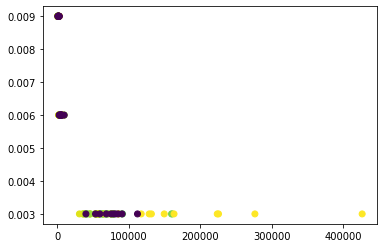

In [64]:

plt.scatter(df_wholMod['Lifetime'], df_wholMod['StrainAmplitude'], c=colorswhole)
cbar = plt.colorbar(mapper)
cbar.set_label('Volume Fraction of Martensite in %')
plt.xscale('log')
plt.title('Crack Initiiation Whole Model')
plt.xlabel('Number of Cycles')
plt.ylabel('Strain')
#plt.show()


#plt.savefig(os.path.join(StudienOrdner, 'ScatterLifetimeWholeMod.png'), bbox_inches='tight', dpi=150, transparent=True)

In [65]:
df_Ferrite = df_lf[df_lf['Phase']=='Ferrite']

In [66]:
colorsFerr = df_Ferrite['Volume_Martensite'].tolist()
colorsFerr = [float(c) for c in colorsFerr]

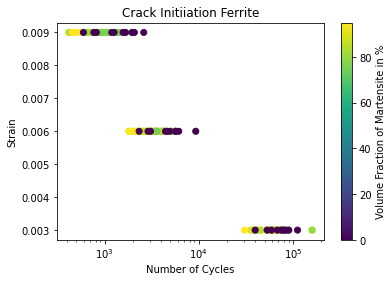

In [67]:
plt.scatter(df_Ferrite['Lifetime'], df_Ferrite['StrainAmplitude'], c=colorsFerr)
cbar = plt.colorbar()
cbar.set_label('Volume Fraction of Martensite in %')
plt.xscale('log')
plt.title('Crack Initiiation Ferrite')
plt.xlabel('Number of Cycles')
plt.ylabel('Strain')
plt.show()

In [68]:
df_mart = df_lf[df_lf['Phase']=='Martensite']

In [69]:
colorsMart = df_mart['Volume_Martensite'].tolist()
colorsMart = [int(c) for c in colorsMart]

NameError: name 'mapper' is not defined

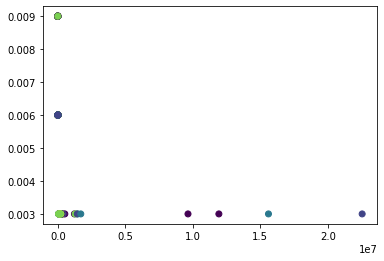

In [70]:
plt.scatter(df_mart['Lifetime'], df_mart['StrainAmplitude'], c=colorsMart)
cbar = plt.colorbar(mapper)
cbar.set_label('Volume Fraction of Martensite in %')
plt.xscale('log')
plt.title('Crack Initiiation Martensite')
plt.xlabel('Number of Cycles')
plt.ylabel('Strain')
plt.show()

Abwärts erstelle confidence intervalle

In [71]:
strainll = np.unique(df_wholMod['StrainAmplitude'].tolist())
dic_df_conf = {}
ch_df = {'whole': df_wholMod, 'Ferrite': df_Ferrite, 'Martensite': df_mart}
dd_ll = ['whole','Ferrite','Martensite']
for dd in dd_ll:
    df_conf = pd.DataFrame({'StrainAmplitude': strainll})
    for vols in np.unique(ll_volf):
        mean = []
        l_bound= []
        u_bound =  []
        for strain in strainll:
            rdf = ch_df[dd][ch_df[dd]['Volume_Martensite'] == vols]
            rdf = rdf[rdf['StrainAmplitude'] == strain]
            a = rdf['Lifetime'].tolist()
            if len(a) != 0:
                s_mean = np.mean(a)
                sl_bound, su_bound = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))
                if sl_bound<0:
                    sl_bound = min(a)
            if len(a) == 0:
                s_mean,sl_bound, su_bound = np.NaN,np.NaN,np.NaN

            mean.append(s_mean), l_bound.append(sl_bound), u_bound.append(su_bound)
        df_conf['l_bound VolF '+ str(vols)] = l_bound
        df_conf['mean VolF '+ str(vols)] = mean
        df_conf['u_bound VolF '+ str(vols)] = u_bound
    dic_df_conf[dd] = df_conf

In [73]:
print(np.unique(ll_volf))
ll_volumes = [kk for kk in np.unique(ll_volf) if kk not in [0.0, 75.0, 80.0]]
ll_volumes.append(0.0)
ll_volumes

[  0.  75.  80.  85.  90.  95. 100.]


[85.0, 90.0, 95.0, 100.0, 0.0]

Plotten der confidence Intervalle

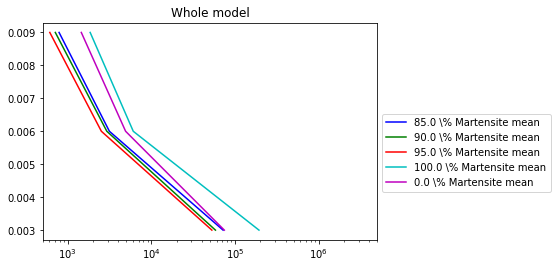

In [74]:
colorlist = ['b', 'g', 'r', 'c', 'm', 'y']
df_conf = dic_df_conf['whole']

for num, vols in enumerate(ll_volumes):

    plt.plot(df_conf['mean VolF ' + str(vols)],df_conf['StrainAmplitude'], label= (str(vols)+' \% Martensite mean'), color=colorlist[num])
    #plt.fill_betweenx(df_conf['StrainAmplitude'], df_conf['l_bound VolF ' + str(vols)], df_conf['u_bound VolF ' + str(vols)], color=colorlist[num], alpha=.2, label=' confidence interval 95\%')
plt.xscale('log')
plt.title('Whole model')
plt.legend(loc= 'lower left',bbox_to_anchor=(1.0, 0.2))#, ncol=2 )
plt.xlim([5*10**2,5*10**6])

tikzplotlib.save(os.path.join(StudienOrdner, 'ConfLifetimeWholeMod.tex'))
plt.savefig(os.path.join(StudienOrdner, 'ConfLifetimeWholeMod.png'), bbox_inches='tight', dpi=150, transparent=True)


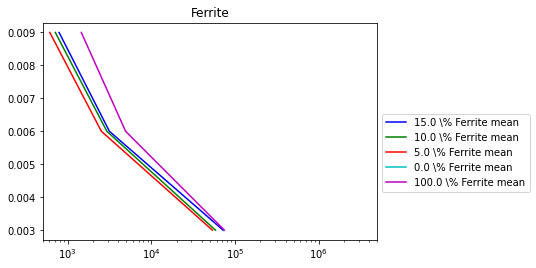

In [75]:
colorlist = ['b', 'g', 'r', 'c', 'm', 'y']
df_conf = dic_df_conf['Ferrite']
volls_red = []
for num, vols in enumerate(np.unique(ll_volf)):
    #if num%2 == 0:
        volls_red.append(vols)
    
for num, vols in enumerate(ll_volumes):
    plt.plot(df_conf['mean VolF ' + str(vols)],df_conf['StrainAmplitude'], label= (str(100-vols)+' \% Ferrite mean'), color=colorlist[num])
    #plt.fill_betweenx(df_conf['StrainAmplitude'], df_conf['l_bound VolF ' + str(vols)], df_conf['u_bound VolF ' + str(vols)], color=colorlist[num], alpha=.2, label=' confidence interval 95\%')
plt.xscale('log')
plt.title('Ferrite')
plt.legend(loc= 'lower left',bbox_to_anchor=(1.0, 0.2))#, ncol=2 )
plt.xlim([5*10**2,5*10**6])

tikzplotlib.save(os.path.join(StudienOrdner, 'ConfLifetimeFerrite.tex'))
plt.savefig(os.path.join(StudienOrdner, 'ConfLifetimeFerrite.png'), bbox_inches='tight', dpi=150, transparent=True)


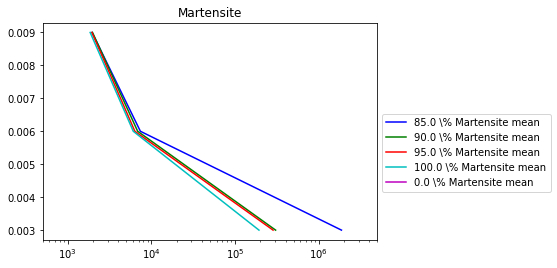

In [89]:
colorlist = ['b', 'g', 'r', 'c', 'm', 'y']
df_conf = dic_df_conf['Martensite']
volls_red = []
for num, vols in enumerate(np.unique(ll_volf)):
    #if num%2 == 0:
        volls_red.append(vols)
    
for num, vols in enumerate(ll_volumes):
    plt.plot(df_conf['mean VolF ' + str(vols)],df_conf['StrainAmplitude'], label= (str(vols)+' \% Martensite mean'), color=colorlist[num])
    #plt.fill_betweenx(df_conf['StrainAmplitude'], df_conf['l_bound VolF ' + str(vols)], df_conf['u_bound VolF ' + str(vols)], color=colorlist[num], alpha=.2, label=' confidence interval 95\%')
plt.xscale('log')
plt.xlim([5*10**2,5*10**6])
plt.legend(loc = 'lower left',bbox_to_anchor=(1.0, 0.2))#, ncol=2 )
plt.title('Martensite')



#tikzplotlib.save(os.path.join(StudienOrdner, 'ConfLifetimeMartensite.tex'))
#plt.savefig(os.path.join(StudienOrdner, 'ConfLifetimeMartensite.png'), bbox_inches='tight', dpi=150, transparent=True)


In [77]:
### AChtung lower bound ist nicht ganz korrekt das dieser durch die große varianz eine negative Lebensdauer angeben würde
### dacher ist in diesen Fällen der Lower Bound = minimum der Lebenszeit für definierte Dehnung und Volumengehalt

In [78]:
mnbv= df_lf[df_lf['StrainAmplitude']==0.009]
mnbv= mnbv[mnbv['Seed']=='93426']
mnbv[mnbv['Volume_Martensite'].isin([95.0,75.0])]

,Unnamed: 0,ModelName,ModelGroup,Lifetime,Phase,_LoadingMode,StrainAmplitude,StrainMean,StressAmplitude,StressMean,FIPmax,FIPmaxLocal,FIPcrit,m_FIP,IsExperimentalData,Volume_Martensite,Seed
30,10.0,DisTest_Seed93426_Strain0p9_VolumeFraction95,ALL,418.085233,wholeMod,0.0,0.009,0.0,1595.385,-0.035,0.076082,0.124378,2.521240,1.724138,0,95.0,93426
31,10.1,DisTest_Seed93426_Strain0p9_VolumeFraction95,ALL,2102.661335,Martensite,0.0,0.009,0.0,1595.385,-0.035,0.006098,0.013427,0.515708,1.724138,0,95.0,93426
32,10.2,DisTest_Seed93426_Strain0p9_VolumeFraction95,ALL,418.085233,Ferrite,0.0,0.009,0.0,1595.385,-0.035,0.076082,0.124378,2.521240,1.724138,0,95.0,93426
73,26.0,DisTest_Seed93426_Strain0p9_VolumeFraction75,ALL,1447.805034,wholeMod,0.0,0.009,0.0,1333.730,-0.180,0.037017,0.187961,2.521240,1.724138,0,75.0,93426
74,26.1,DisTest_Seed93426_Strain0p9_VolumeFraction75,ALL,1447.805034,Ferrite,0.0,0.009,0.0,1333.730,-0.180,0.037017,0.187961,2.521240,1.724138,0,75.0,93426
75,26.2,DisTest_Seed93426_Strain0p9_VolumeFraction75,ALL,3452.891332,Martensite,0.0,0.009,0.0,1333.730,-0.180,0.004574,0.014869,0.515708,1.724138,0,75.0,93426


Bestimme liegt geringste Lebenszeit immer mit Ferrit zusammen? 

In [79]:
df_03 = df_lf[df_lf['StrainAmplitude']==0.003]
df_06 = df_lf[df_lf['StrainAmplitude']==0.006]
df_09 = df_lf[df_lf['StrainAmplitude']==0.009]

In [80]:
c_df = df_03 
ll_model = c_df['Unnamed: 0'].tolist()


ll_prob_phase = []
for mod in ll_model:
    if mod%1 == 0:
        ltime = c_df[c_df['Unnamed: 0'] == mod]['Lifetime']
        
        phases = [g for g in ll_model if int(mod) == int(g) and g!=mod]
        
        for ph in phases:
            if float(c_df[c_df['Unnamed: 0'] == ph]['Lifetime']) == float(ltime):
                ll_prob_phase.append([len(phases),df_lf[df_lf['Unnamed: 0'] == ph]['Phase'].values[0]])        

print(np.unique(ll_prob_phase,axis=0))

TypeError: cannot convert the series to <class 'float'>

In [81]:
ll_prob_phase = []
for mod in ll_model:
    if mod%1 == 0:
        ltime = df_lf[df_lf['Unnamed: 0'] == mod]['Lifetime']
        
        phases = [g for g in ll_model if int(mod) == int(g) and g!=mod]
        ltime = 9e300
        phaseprob = ''
        for ph in phases:
            if float(df_lf[df_lf['Unnamed: 0'] == ph]['Lifetime']) < ltime:
                ltime = float(df_lf[df_lf['Unnamed: 0'] == ph]['Lifetime'])
                phaseprob = df_lf[df_lf['Unnamed: 0'] == ph]['Phase'].values[0]
        ll_prob_phase.append([len(phases),phaseprob])        

print(np.unique(ll_prob_phase,axis=0))

TypeError: cannot convert the series to <class 'float'>

In [85]:
strainll = np.unique(df_wholMod['StrainAmplitude'].tolist())
dic_df_StressAmp = {}
ch_df = {'whole': df_wholMod, 'Ferrite': df_Ferrite, 'Martensite': df_mart}
dd_ll = ['whole','Ferrite','Martensite']
for dd in dd_ll:
    df_conf = pd.DataFrame({'StrainAmplitude': strainll})
    for vols in np.unique(ll_volf):
        mean = []
        l_bound= []
        u_bound =  []
        for strain in strainll:
            rdf = ch_df[dd][ch_df[dd]['Volume_Martensite'] == vols]
            rdf = rdf[rdf['StrainAmplitude'] == strain]
            a = rdf['StressAmplitude'].tolist()
            if len(a) != 0:
                s_mean = np.mean(a)
                sl_bound, su_bound = st.t.interval(0.95, len(a)-1, loc=np.mean(a), scale=st.sem(a))
                if sl_bound<0:
                    sl_bound = min(a)
            if len(a) == 0:
                s_mean,sl_bound, su_bound = np.NaN,np.NaN,np.NaN

            mean.append(s_mean), l_bound.append(sl_bound), u_bound.append(su_bound)
        df_conf['l_bound VolF '+ str(vols)] = l_bound
        df_conf['mean VolF '+ str(vols)] = mean
        df_conf['u_bound VolF '+ str(vols)] = u_bound
    dic_df_StressAmp[dd] = df_conf

Plotten confidence Intervalle bezogen auf Stress::

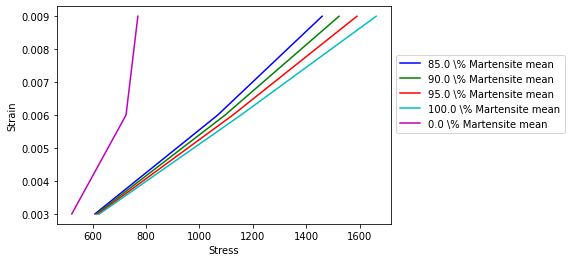

In [86]:
colorlist = ['b', 'g', 'r', 'c', 'm', 'y']

df_conf = dic_df_StressAmp['whole']
for num, vols in enumerate(ll_volumes):
    plt.plot(df_conf['mean VolF ' + str(vols)],df_conf['StrainAmplitude'], label= (str(vols)+' \% Martensite mean'), color=colorlist[num])
    #plt.fill_betweenx(df_conf['StrainAmplitude'], df_conf['l_bound VolF ' + str(vols)], df_conf['u_bound VolF ' + str(vols)], color=colorlist[num], alpha=.2, label=' confidence interval 95\%')
#plt.xscale('log')
plt.legend(bbox_to_anchor=(1.0, 0.8), ncol=1 )
plt.xlabel('Stress')
plt.ylabel('Strain')
plt.title('')


tikzplotlib.save(os.path.join(StudienOrdner, 'StressAmplitude.tex'))
plt.savefig(os.path.join(StudienOrdner, 'StressAmplitude.png'), bbox_inches='tight', dpi=150, transparent=True)


In [87]:
df_conf

,StrainAmplitude,l_bound VolF 0.0,mean VolF 0.0,u_bound VolF 0.0,l_bound VolF 75.0,mean VolF 75.0,u_bound VolF 75.0,l_bound VolF 80.0,mean VolF 80.0,u_bound VolF 80.0,...,u_bound VolF 85.0,l_bound VolF 90.0,mean VolF 90.0,u_bound VolF 90.0,l_bound VolF 95.0,mean VolF 95.0,u_bound VolF 95.0,l_bound VolF 100.0,mean VolF 100.0,u_bound VolF 100.0
0,0.003,521.687243,522.23840,522.789557,597.358805,597.89685,598.434895,602.960271,603.4456,603.930929,...,609.519237,614.059961,614.64785,615.235739,619.664959,620.40605,621.147141,625.320210,625.8033,626.286390
1,0.006,723.583532,725.30785,727.032168,1013.479630,1016.18950,1018.899370,1039.756564,1041.9895,1044.222436,...,1070.433682,1094.632513,1096.21350,1097.794487,1123.468423,1125.16250,1126.856577,1154.470332,1155.3550,1156.239668
2,0.009,767.629556,769.65780,771.686044,1335.684642,1341.36850,1347.052358,1394.812067,1399.3035,1403.794933,...,1463.108581,1520.394653,1523.18100,1525.967347,1587.246359,1590.09100,1592.935641,1660.758063,1662.0265,1663.294937
